1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.




In [51]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-darkgrid')
warnings.simplefilter("ignore")
from sklearn.datasets import make_regression

In [52]:
X, y_true = make_regression(n_samples=100, n_features=20)
X = X.T

In [53]:
def calc_mse(y_true: np.array, y_pred: np.array) -> float:
    """
    Вычисление метрики MSE
    :param y_true: Вектор истинных ответов
    :param y_pred: Вектор прогнозов
    :return score: float Значение метрики качества
    """
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))
    return score

def fit_lienear_model(
        X: np.array,
        y: np.array,
        learning_rate: float = 0.01,
        n_iters: int = 10000,
        tol: float = 1e-05):
    """
    Обучение модели линейной регрессии алгоритном градиентного спуска
    
    :parameter
    X: np.array
    Матрица признаков для обучния
    y: np.array
    Вектор истинных y
    learning_rate: float, optional, default = 0.01
    Скорость обучения модели
    n_iters: int, optional, default = 10000
    Количество итераций оубчения
    tol: Минимальное значимое изменение ошибки, при котором
    обучение продолжается. Если изменение ошибки на соседних
    итерациях меньше указанной величины, то обучение прекращается
    
    
    :
    """
    weights = np.random.randn(X.shape[0])
    errors_history, weights_history = [], [weights]
    
    for n_iter in range(n_iters):
        y_pred = np.dot(weights, X)
        current_error = calc_mse(y, y_pred)
        weights = weights - 2*learning_rate*np.dot(X, (y_pred - y))/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)
        if n_iter > 2 and np.abs(errors_history[-1] - errors_history [-2]) < tol:
            break
    return weights, weights_history, errors_history



In [54]:
weights, weights_history, errors_history = fit_lienear_model(X,y_true)
print(errors_history[-1])

0.0006910314321247088


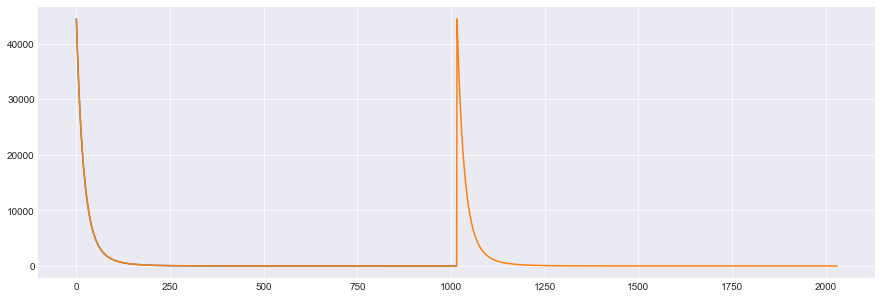

[44481.10679632059,
 42286.409453244836,
 40212.07156109068,
 38250.946940245434,
 36396.34202440037,
 34641.98560762457,
 32982.0007048545,
 31410.878372891886,
 29923.453350367035,
 28514.881385628098,
 27180.618131224277,
 25916.399492624016,
 24718.223327104755,
 23582.33239641975,
 22505.198483939148,
 21483.507593519964,
 20514.146153424717,
 19594.18815421799,
 18720.883154759777,
 17891.645095215335,
 17104.041860443725,
 16355.785541238089,
 15644.723344695347,
 14968.829108514912,
 14326.195377286105,
 13715.026001842583,
 13133.62922555736,
 12580.411224040467,
 12053.870067099348,
 11552.590074042972,
 11075.236535468945,
 10620.550776579723,
 10187.345538841466,
 9774.500658437399,
 9380.959021486102,
 9005.72277740349,
 8647.849793092999,
 8306.450331859762,
 7980.683942067949,
 7669.756541603073,
 7372.917685168183,
 7089.458002340659,
 6818.706795149758,
 6560.029784708658,
 6312.826997153146,
 6076.530779806524,
 5850.6039391098475,
 5634.5379924326435,
 5427.851526414